### Review lecture 1:
Reading a wavefile and plotting its amplitude spectrum
Credits: SMS course (Xavier Serra), Lecture 4
https://github.com/MTG/sms-tools

In [4]:
import os
import sys
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft
import matplotlib.pyplot as plt
#Adding to path the models folder of sms-tools
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/'))
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/utilFunctions_C/'))

import dftModel as DFT
import utilFunctions as UF

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

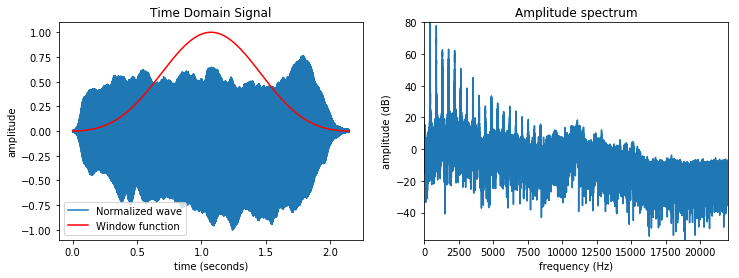

In [7]:
soundsDIR='sms-tools/sounds/'
(fs,x)=UF.wavread(soundsDIR+'flute-A4.wav')#returns a float array for x
#Normalize maximum amplitude to 1
x=x/np.max(np.abs(x))
#Create a windowing function(blackman) of size of the signal
w = get_window('blackman', x.size)

#Ploting the time-domain signal
t=np.arange(x.size)/float(fs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t,x, label='Normalized wave')
plt.plot(t,w,'r', label='Window function')
plt.legend()
plt.title('Time Domain Signal')
plt.ylabel('amplitude')
plt.xlabel('time (seconds)')
plt.axis('tight')

#Your code starts here----------
#Write the code to plot the amplitude spectrum (in dBs)
# the signal should be windowed before computing the spectrum

#Initialize parameters
#Let's pick an fft size that is a power of 2 higher than the signal size
fftN=int(pow(2,np.ceil(np.log2(x.size))))

#Computing log-magnitude spectrum
xw=x*w#multiply the signal with the window function
X=fft(x,fftN)#computing fft
absX=np.abs(X[:int(fftN/2)])#taking first half of the spectrum and its magnitude
absX[absX<np.finfo(float).eps]=np.finfo(float).eps#getting rid of zeros before log in the next step
mX=20*np.log10(absX)

#Plot amplitude spectrum
plt.subplot(1, 2, 2)
freqAx_normalized=np.arange(mX.size)/float(fftN)#Normalized frequency axis
freqAxHz=float(fs)*freqAx_normalized
plt.plot(freqAxHz, mX)
plt.axis([0, fs/2.0, min(mX), max(mX)])
plt.title('Amplitude spectrum')
plt.ylabel('amplitude (dB)')
plt.xlabel('frequency (Hz)')
plt.show()
#Your code ends here----------